In [13]:
using Plots
plotlyjs(dpi=300, display_type=:inline)
# pyplot(dpi=300)
# unicodeplots()
# theme(:dracula)
theme(:default)

In [14]:
function parseTiming(fname::String)::Real
    f = open(fname)
    for line in eachline(f)
        occursin("Braid", line) && continue
        occursin("wall time", line) && return parse(Float64, split(line)[end])
    end
end

function parseIters(fname::String)::Integer
    f = open(fname)
    for line in eachline(f)
        occursin("max iterations", line) && continue
        occursin("iterations", line) && return parse(Int64, split(line)[end])
    end
end

parseIters (generic function with 1 method)

In [30]:
ncores = [1, 2, 4, 8, 16, 32, 64, 128, 512, 1024]
ml = 5
cf = 16
tΔ = zeros(length(ncores)) # preallocate mutable types
tθ = zeros(length(ncores))
itersΔ = parseIters("lorenz_theta_Delta_nc1_cf$(cf)_ml$(ml)")
itersθ = parseIters("lorenz_theta_nc1_cf$(cf)_ml$(ml)")

for i in 1:length(ncores)
    tΔ[i] = parseTiming("lorenz_theta_Delta_nc$(ncores[i])_cf$(cf)_ml$(ml)")
    tθ[i] = parseTiming("lorenz_theta_nc$(ncores[i])_cf$(cf)_ml$(ml)")
end
println("θ iters: $(itersθ)")
println("Δ iters: $(itersΔ)")

θ iters: 13
Δ iters: 8


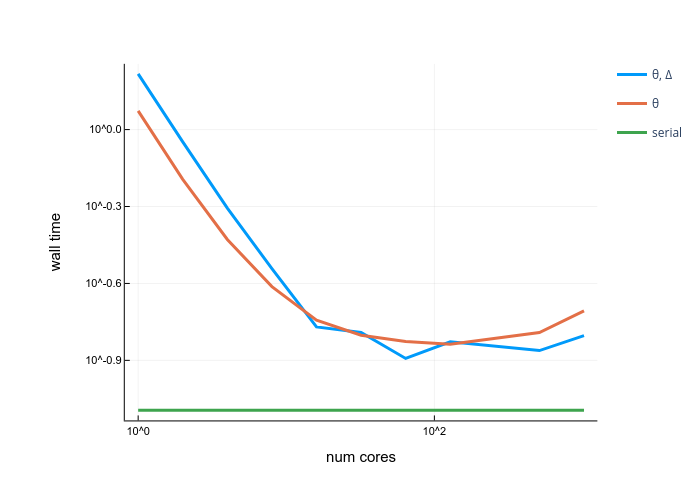

In [31]:
pl = plot(ncores, [tΔ tθ],
          linewidth=3,
          dpi=200,
          label=["θ, Δ" "θ"],
          xaxis=("num cores", :log),
          yaxis=("wall time", :log),
)
plot!(pl, ncores, x->parseTiming("lorenz_theta_ml1"), linewidth=3, label="serial")
savefig(pl, "scaling_cf$(cf)_ml$(ml).png")
plot!()

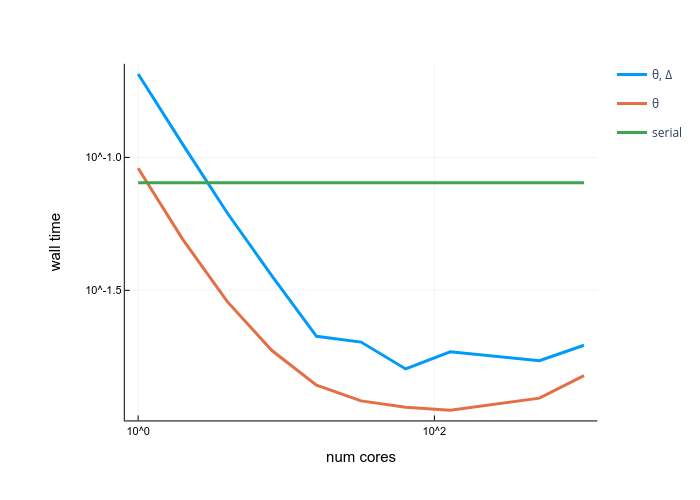

In [32]:
pl = plot(ncores, [tΔ/itersΔ tθ/itersθ],
          linewidth=3,
          dpi=200,
          label=["θ, Δ" "θ"],
          xaxis=("num cores", :log),
          yaxis=("wall time", :log),
)
plot!(pl, ncores, x->parseTiming("lorenz_theta_ml1"), linewidth=3, label="serial")
savefig(pl, "scaling_cf$(cf)_ml$(ml)_normalized.png")
plot!()

In [22]:
parseTiming("lorenz_theta_ml1")

0.08037